# Feature Engineering
---

## 0. Constants

In [250]:
RAW_DATA_PATH = "../data/raw/raw.csv"
TRAIN_DATA_PATH = "../data/processed/train.csv"
TEST_DATA_PATH = "../data/processed/test.csv"

---
## 1. Imports

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.options.display.max_columns = 50
%matplotlib inline

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_regression

In [91]:
retail_df = pd.read_csv(RAW_DATA_PATH) 
retail_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


## 1.1 Functions

In [145]:
def calculate_mi_scores(X, y, discrete_features):
    """Calculates Mutual Information scores of non-linear relationships between features 'X' & target 'y'. """
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns).sort_index(ascending=False)
    return mi_scores

---
## 2. Feature Engineering

In [92]:
retail_df.shape

(421570, 16)

In [93]:
retail_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [94]:
retail_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature     138586
Fuel_Price      138586
MarkDown1       312211
MarkDown2       333176
MarkDown3       325015
MarkDown4       324027
MarkDown5       311805
CPI             138586
Unemployment    138586
Type                 0
Size                 0
dtype: int64

### Encode Date column into Year, Month & WeekOfYear columns

In [95]:
retail_df["Date"] = pd.to_datetime(retail_df["Date"])

In [96]:
retail_df["Month"]=retail_df.Date.dt.month

In [252]:
retail_df["Year"]=retail_df.Date.dt.year

In [253]:
retail_df["WeekOfYear"]=retail_df.Date.dt.weekofyear

C:\Users\MR\AppData\Local\Temp\ipykernel_29928\3639321428.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  retail_df["WeekOfYear"]=retail_df.Date.dt.weekofyear


In [276]:
retail_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,WeekOfYear
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315,2,2010,5
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315,2,2010,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2,2010,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2,2010,8
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315,3,2010,9


### Split data to prevent data leakage

In [255]:
# X = retail_df.drop("Weekly_Sales", axis=1)
# y = retail_df["Weekly_Sales"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

X = retail_df.copy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=11)

### Impute Temperature, Fuel price, CPI & Unemployment Columns

In [256]:
imputed_X_train = X_train.copy()
imputed_X_test = X_test.copy()

In [257]:
imputed_X_train.shape, imputed_X_test.shape

((337256, 19), (84314, 19))

In [258]:
#Impute Temperature, Fuel price, CPI & Unemployment with the mean of their respective month
imputer = SimpleImputer(strategy='mean')

null_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]


for month in imputed_X_train.Month.unique():
    imputed_X_train.loc[imputed_X_train.Month == month, null_features]= imputer.fit_transform(imputed_X_train.loc[imputed_X_train.Month == month, null_features])


In [259]:
imputed_X_train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       249770
MarkDown2       266573
MarkDown3       260001
MarkDown4       259242
MarkDown5       249441
CPI                  0
Unemployment         0
Type                 0
Size                 0
Month                0
Year                 0
WeekOfYear           0
dtype: int64

In [260]:
#Impute test data
for month in imputed_X_test.Month.unique():
    imputed_X_test.loc[imputed_X_test.Month == month, null_features]= imputer.transform(imputed_X_test.loc[imputed_X_test.Month == month, null_features])


In [261]:
imputed_X_test.isnull().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       62441
MarkDown2       66603
MarkDown3       65014
MarkDown4       64785
MarkDown5       62364
CPI                 0
Unemployment        0
Type                0
Size                0
Month               0
Year                0
WeekOfYear          0
dtype: int64

### Dealing with missing Markdown values

In [262]:
markdown_grouped = retail_df.groupby("Month").agg({"MarkDown1":["min", "mean", "max"],
                                                 "MarkDown2":["min", "mean", "max"],
                                                 "MarkDown3":["min", "mean", "max"],
                                                 "MarkDown4":["min", "mean", "max"],
                                                 "MarkDown5":["min", "mean", "max"]})

markdown_grouped

MarkDown1                         MarkDown2                           \
            min          mean       max       min          mean        max   
Month                                                                        
1          2.40   3676.757668  16432.28     -2.00   4132.196176   23438.57   
2         66.87  12599.482047  41848.34      0.02   5317.959895   19179.87   
3          2.43  14087.982601  88646.76    -10.50    921.502141    8766.77   
4         16.49   4507.276981  32124.49   -265.76   2930.094107   19610.52   
5         57.13   6537.026807  20882.50     43.00    335.279621     512.00   
6          1.94   5534.891919  16717.38     -7.60   6499.686832   45971.43   
7          0.27   4432.169336  11481.26     -2.50    136.304700     688.66   
8         35.76   8011.844063  37707.43    -20.00     71.551946     370.35   
9         53.10   6545.818729  26306.03      1.00     42.779679     245.91   
10        18.00   3459.732638  13749.10     -7.01     68.773298     364.57   
11         2.80   6112.168871  34348.14      0.00   3732.657352   44021.61   
12         2.42   2824.730194   8321.44      0.03  16354.576432  104519.54   

      MarkDown3                          MarkDown4                         \
            min          mean        max       min         mean       max   
Month                                                                       
1          0.06     97.232789     860.90      2.50   834.346023   4069.79   
2          0.44     21.020880     167.88      0.46  7639.314613  35364.08   
3         -1.00     44.575778     788.56      2.36  9614.587886  67474.85   
4         -0.20     22.958393     203.99      0.87   834.993358   4162.20   
5          0.24    267.608937    1095.85      0.92  1451.862784   9506.75   
6          0.01     64.774333     839.74      4.92  1705.777789   6058.60   
7          0.01     13.793667     145.72      0.41  3542.037205  17151.91   
8          0.00     45.760186     371.06      0.78  4186.255010  15675.98   
9          0.15     28.335714     677.64      1.50  1619.079076  11296.93   
10         0.15     46.042053     250.60      5.94   640.190336   2421.08   
11         1.32  20555.740257  141630.61      3.00  1700.890034  20834.37   
12         0.60    703.485337   10748.31      2.00   495.038743   1772.02   

      MarkDown5                          
            min         mean        max  
Month                                    
1        153.04  3119.747505   24241.12  
2        537.36  5157.338665   23647.05  
3        227.12  3674.312081   24354.20  
4        284.28  3025.241480   15101.90  
5        419.93  3478.318029   18547.03  
6        246.46  5384.872107   85851.87  
7        411.08  5546.314521  105223.11  
8        329.61  3826.887397   17926.84  
9        164.08  5610.689899   18054.35  
10       180.07  2597.711262   11831.06  
11       135.16  4238.247499   27754.23  
12       153.90  3345.636537   17699.26

> **We can see that markdowns are applied with different rates over the months of the year.**

> **Some markdowns are applied with higher max values in certain months than the rest of the year.**

>**For the holiday months [2, 9, 11, 12], some markdowns have higher rates than others. This might imply effect on sales.**

In [263]:
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

#Impute Markdown of Train data
imputed_X_train[markdown_cols] = imputed_X_train[markdown_cols].interpolate(limit_direction="both")

In [264]:
imputed_X_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
WeekOfYear      0
dtype: int64

In [265]:
#Impute Markdown of Test data
imputed_X_test[markdown_cols] = imputed_X_test[markdown_cols].interpolate(limit_direction="both")

In [266]:
imputed_X_test.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
WeekOfYear      0
dtype: int64

### Encoding "Type" & "IsHoliday" columns

In [267]:
encoder = OrdinalEncoder()

encoding_cols = ["Type", "IsHoliday"]

# Encode Train data
imputed_X_train[encoding_cols] = encoder.fit_transform(imputed_X_train[encoding_cols])

# for col in encoding_cols:
#     imputed_X_train[col] = encoder.fit_transform(imputed_X_train[col])

In [268]:
#Encode Test data   
imputed_X_test[encoding_cols] = encoder.fit_transform(imputed_X_test[encoding_cols])

# for col in encoding_cols:
#     imputed_X_test[col] = encoder.fit_transform(imputed_X_test[col])

### Check correlation between features & target

In [269]:
imputed_X_train.corr()["Weekly_Sales"]

C:\Users\MR\AppData\Local\Temp\ipykernel_29928\417409678.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  imputed_X_train.corr()["Weekly_Sales"]


Store          -0.085097
Dept            0.148800
Weekly_Sales    1.000000
IsHoliday       0.012513
Temperature    -0.006687
Fuel_Price     -0.004374
MarkDown1       0.024851
MarkDown2       0.008700
MarkDown3       0.019353
MarkDown4       0.009805
MarkDown5       0.026199
CPI            -0.017222
Unemployment   -0.022505
Type           -0.182444
Size            0.243949
Month           0.028896
Year           -0.009812
WeekOfYear      0.028112
Name: Weekly_Sales, dtype: float64

C:\Users\MR\AppData\Local\Temp\ipykernel_29928\3932876924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(imputed_X_train.corr()["Weekly_Sales"].to_frame(), annot=True, cmap= 'coolwarm')


<Axes: >

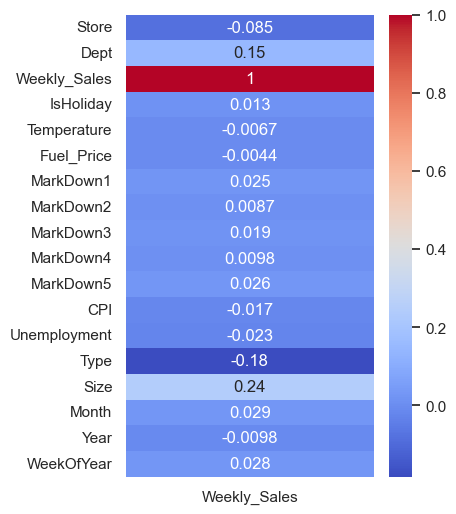

In [270]:
fig = plt.figure(figsize=(4,6))
sns.heatmap(imputed_X_train.corr()["Weekly_Sales"].to_frame(), annot=True, cmap= 'coolwarm')

### Calculate Mutual Information for non-linear relationship between features & target.

In [271]:
imputed_X_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                     int32
Size                     int64
Month                    int64
Year                     int64
WeekOfYear               int64
dtype: object

In [272]:
imputed_X_train["Type"] = imputed_X_train["Type"].astype('int64')

In [273]:
mi_imputed_X_train = imputed_X_train.drop("Date", axis=1)

In [274]:
# All discrete features should now have integer dtypes
discrete_features = mi_imputed_X_train.dtypes == np.int64
discrete_features

Store            True
Dept             True
Weekly_Sales    False
IsHoliday        True
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Type             True
Size             True
Month            True
Year             True
WeekOfYear       True
dtype: bool

In [275]:
mi_scores = calculate_mi_scores(mi_imputed_X_train, y_train, discrete_features=discrete_features)
mi_scores.sort_values(ascending=False)

Weekly_Sales    11.317074
Dept             0.848417
Store            0.166465
Size             0.153391
Type             0.064040
Unemployment     0.055515
CPI              0.019921
Temperature      0.015354
Fuel_Price       0.013056
Year             0.011078
MarkDown1        0.007629
MarkDown5        0.006597
Month            0.006226
WeekOfYear       0.004473
MarkDown2        0.002351
IsHoliday        0.001295
MarkDown4        0.001224
MarkDown3        0.000000
Name: MI Scores, dtype: float64

>**Mutual Information showed results close to correlation. Both show that "Dept" & "Size" of the store affect the weekly sales more than other columns.**

## 3. Save Final Data

In [277]:
final_train_data = imputed_X_train.drop("Date", axis=1)
final_test_data = imputed_X_test.drop("Date", axis=1)

In [278]:
final_train_data.to_csv(TRAIN_DATA_PATH, index=False, header=True)
final_test_data.to_csv(TEST_DATA_PATH, index=False, header=True)